In [12]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

data = np.load('3d_keypoints.npy')
print(np.shape(data))

f_name = './Keypoints/detections/2017-05-30-15-57-34/detections_3d.csv'
raw_data = np.genfromtxt(f_name,delimiter = ',')
nice_data = np.reshape(raw_data,[695,20,3])

print(raw_data[0])
print(nice_data[0])
print(f_name.replace('.csv','_processed.npy'))
np.save('./test_reshape.npy',nice_data)
print(f_name)

(1791, 20, 3)
[0.29007 0.2143  0.32978 0.31024 0.19823 0.2855  0.26847 0.16138 0.24276
 0.26455 0.15731 0.21447 0.2956  0.1993  0.32571 0.30028 0.17989 0.30421
 0.27653 0.16033 0.27035 0.30316 0.18166 0.30289 0.25707 0.16283 0.24981
 0.29618 0.18041 0.25825 0.28773 0.18551 0.24659 0.29718 0.17558 0.23877
 0.29787 0.1999  0.32522 0.28935 0.20331 0.30091 0.28376 0.17102 0.28811
 0.3024  0.19005 0.29741 0.27145 0.17557 0.22932 0.28357 0.17634 0.25582
 0.28557 0.18227 0.24524 0.2948  0.20527 0.23934]
[[0.29007 0.2143  0.32978]
 [0.31024 0.19823 0.2855 ]
 [0.26847 0.16138 0.24276]
 [0.26455 0.15731 0.21447]
 [0.2956  0.1993  0.32571]
 [0.30028 0.17989 0.30421]
 [0.27653 0.16033 0.27035]
 [0.30316 0.18166 0.30289]
 [0.25707 0.16283 0.24981]
 [0.29618 0.18041 0.25825]
 [0.28773 0.18551 0.24659]
 [0.29718 0.17558 0.23877]
 [0.29787 0.1999  0.32522]
 [0.28935 0.20331 0.30091]
 [0.28376 0.17102 0.28811]
 [0.3024  0.19005 0.29741]
 [0.27145 0.17557 0.22932]
 [0.28357 0.17634 0.25582]
 [0.28557 0.

<IPython.core.display.Javascript object>


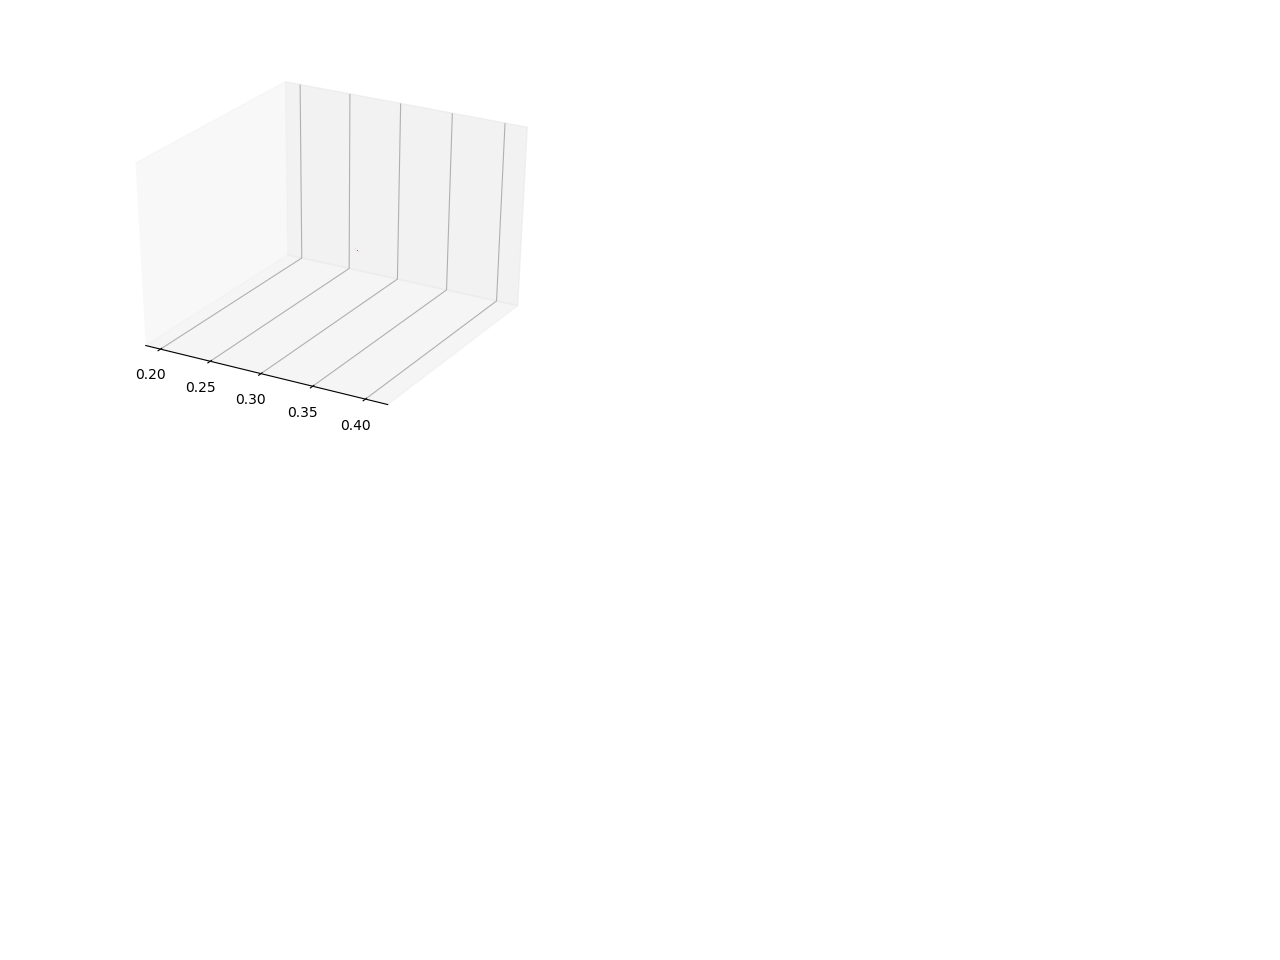

KeyboardInterrupt: 

In [2]:
%matplotlib notebook
keypoint = 0

fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.setxlim = [.20,.40]
ax.setylim = [.20,.40]
ax.setzlim = [.26,.36]

ax.scatter([.20,.40],[.20,.40],[.26,.36])

for t in range(len(data)):
    paths = ax.scatter(data[t,keypoint,0],data[t,keypoint,1],data[t,keypoint,2],color='red')
    fig.canvas.draw()
    paths.remove()

<IPython.core.display.Javascript object>


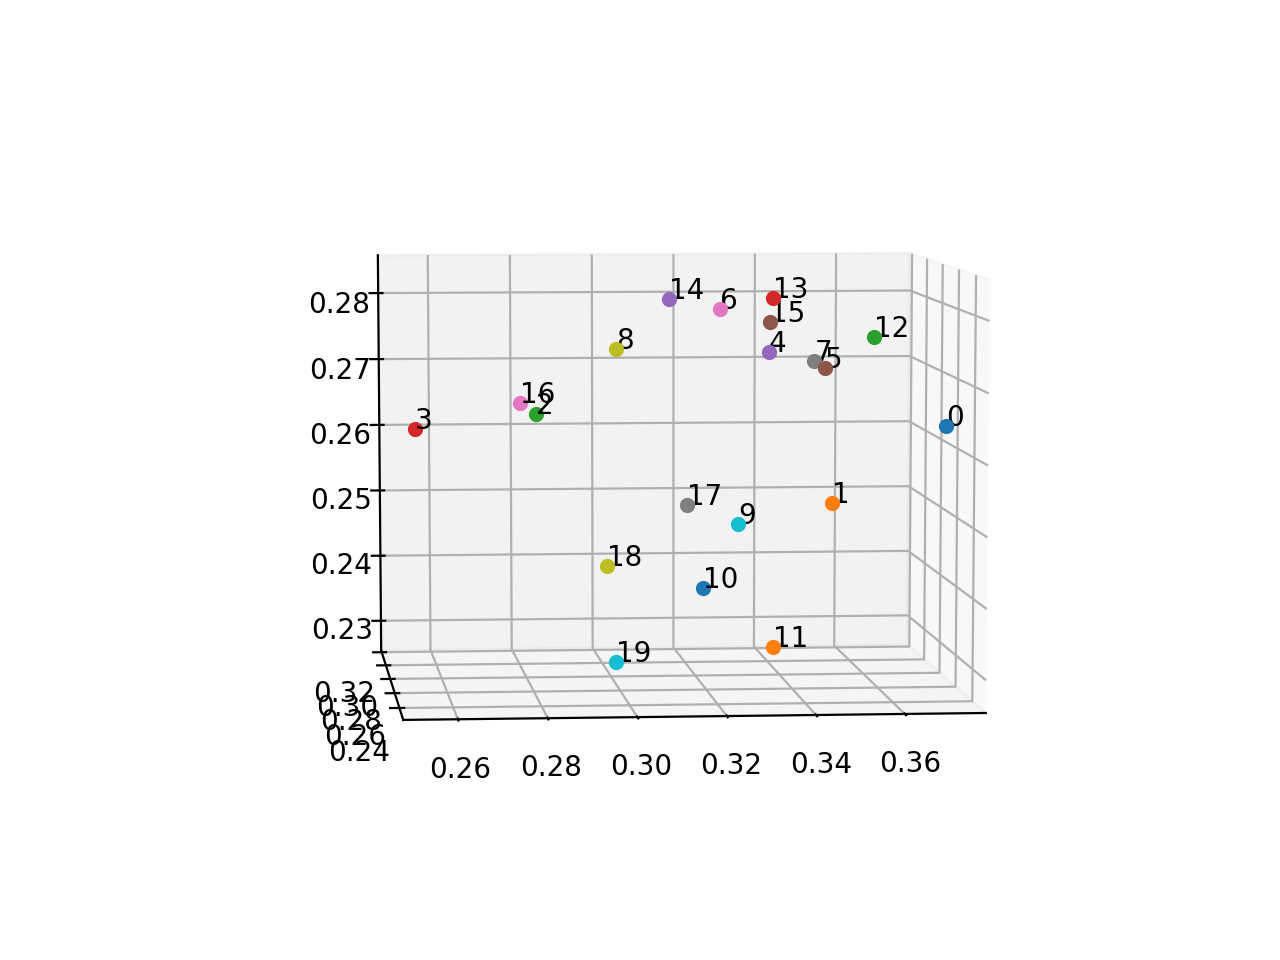

In [3]:
%matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection = '3d')

for p in range(np.shape(data)[1]):
    ax.scatter(data[0,p,0],data[0,p,1],data[0,p,2])
    ax.text(data[0,p,0],data[0,p,1],data[0,p,2],str(p))
    plt.pause(.5)
    fig.canvas.draw()

In [4]:
#wing_distance = [np.linalg.norm(data[t,8,:] - data[t,16,:] for t in range(np.shape(data)[0]))]
actual_time = 18
song_onset = 2.7
ts = np.linspace(0,actual_time,len(data))
ts = ts - song_onset
wing_distance = np.zeros(np.shape(data)[0])
for t in range(len(wing_distance)):
    wing_distance[t] = np.linalg.norm(data[t,8,:] - data[t,16,:]) + .05
tail_height = data[:,3,2] -.1 #- data[0,3,2]
eye_center = (data[:,4,:] + data[:,15,:]) / 2
beak_offset = (data[:,0,2] - eye_center[:,2] ) * 2

In [5]:
from scipy.ndimage.filters import gaussian_filter

tail_height_smooth = gaussian_filter(tail_height, sigma=5)
wing_distance_smooth = gaussian_filter(wing_distance, sigma = 5)
beak_offset_smooth = gaussian_filter(beak_offset, sigma = 5)

<IPython.core.display.Javascript object>


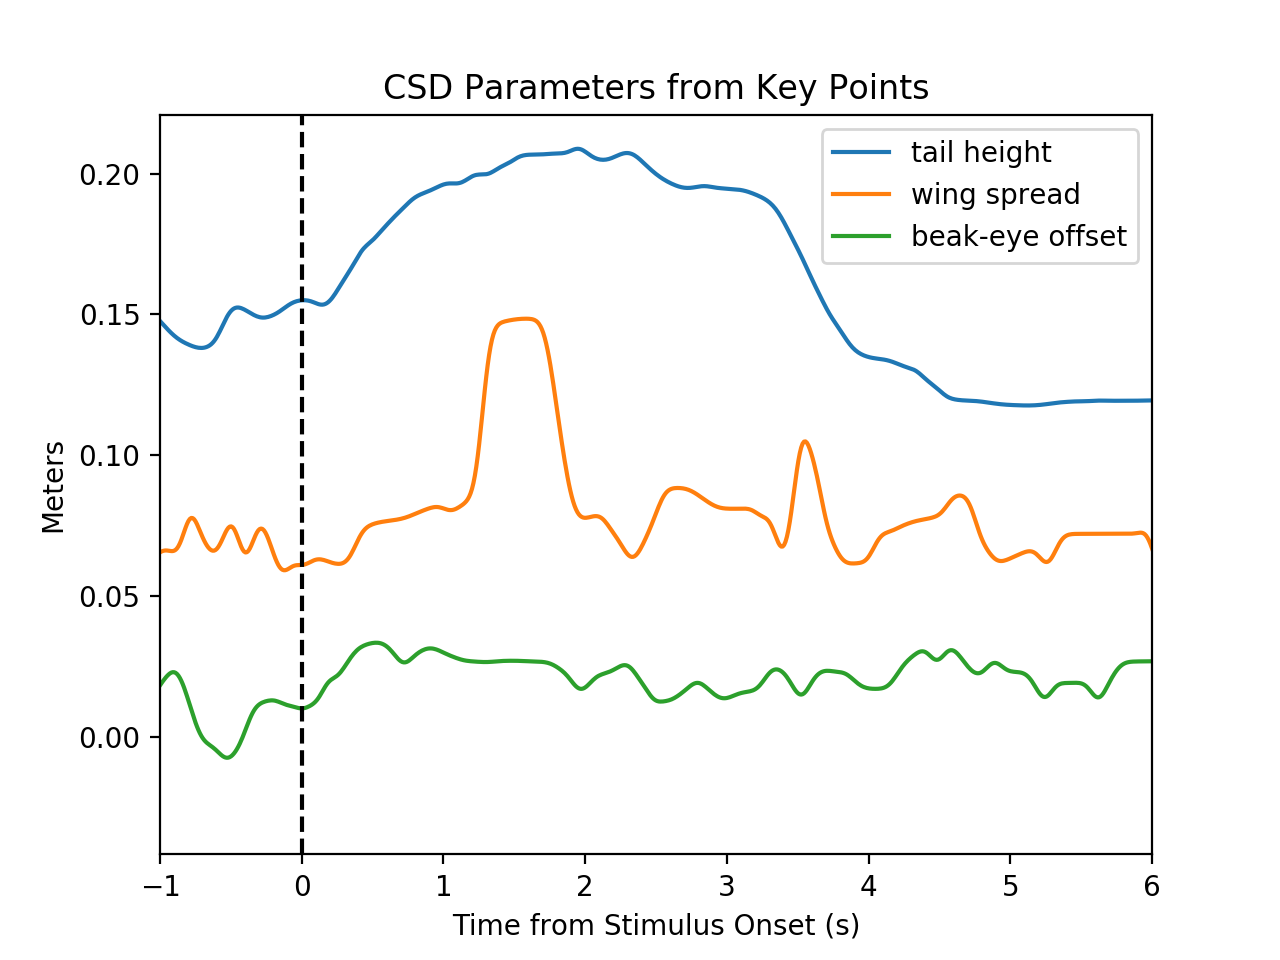

In [6]:
fig, ax = plt.subplots()


ax.plot(ts, tail_height_smooth,label='tail height')
ax.plot(ts, wing_distance_smooth, label='wing spread')
#ax.plot(eye_center)
ax.plot(ts, beak_offset_smooth, label='beak-eye offset')
ax.axvline(0,color='black',linestyle='--')

ax.set_xlim([-1,6])
ax.set_xlabel('Time from Stimulus Onset (s)')
ax.set_ylabel('Meters')

ax.legend()

ax.set_title('CSD Parameters from Key Points')

fig.show()

In [14]:
actual_time = 3
ts = np.linspace(0,actual_time,len(data))
print(ts, tail_height_smooth)

[0.00000000e+00 1.67597765e-03 3.35195531e-03 ... 2.99664804e+00
 2.99832402e+00 3.00000000e+00] [0.15971336 0.15971336 0.15971336 ... 0.15070977 0.15083061 0.15089239]


In [76]:
len(tail_height_smooth)

1791

In [31]:
## Find the origin (the mean of the mode of the feet)

## In original code, this is order
## I should reshape it to make the 3d_keypoints.npy that I use here.
"""
0-2 Beak Tip 0 
3-5 Keel 1
6-8 Tailbone 2
9-  Tip of Tail 3
12- Left Eye 4
15- Left Shoulder 5
18- Left Elbow 6
21- Left Wrist 7
24- Left Wing Tip 8
27- Left Knee 9
30- Left Ankle 10
33- Left Heel 11
36- Right Eye 12 
39- Right Shoulder 13
42- Right Elbow 14
45- RIght Wrist 15
48- Right Wing Tip 16
51- Right Knee 17
54- Right Ankle 18
57- Right Heel 19
"""

print('left foot:',stats.mode(data[:,11]))
print('right foot:',stats.mode(data[:,19]))

origin = np.mean([stats.mode(data[:,11]).mode[0],stats.mode(data[:,19]).mode[0]],0)
centered_data = data - origin
print("origin",origin)

left foot: ModeResult(mode=array([[0.33746716, 0.27746425, 0.23088126]]), count=array([[261, 261, 261]]))
right foot: ModeResult(mode=array([[0.29632115, 0.26202486, 0.22854112]]), count=array([[401, 401, 401]]))
origin [0.31689415 0.26974456 0.22971119]


In [51]:
np.shape(centered_data)
flat_data = np.reshape(centered_data,[1791,60])

In [52]:
## Now, first do a pca of the centered data on one bird
from sklearn.decomposition import PCA

pca = PCA()

principalComponents = pca.fit_transform(flat_data)

## Then do a pca of angles across one bird
## I should define the coordinate system for the space too.


In [53]:
np.round(pca.explained_variance_ratio_,2)

array([0.79, 0.06, 0.04, 0.03, 0.01, 0.01, 0.01, 0.01, 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  ])

In [56]:
print(np.round(pca.components_[0],3))

[-0.205  0.158 -0.045 -0.166  0.144 -0.026 -0.176  0.015 -0.009 -0.185
 -0.075  0.001 -0.21   0.141 -0.043 -0.217  0.129 -0.026 -0.212  0.087
 -0.016 -0.224  0.123 -0.025 -0.198  0.009 -0.006 -0.213  0.109 -0.015
 -0.231  0.072 -0.013 -0.23   0.104 -0.009 -0.202  0.153 -0.043 -0.182
  0.124 -0.025 -0.179  0.087 -0.017 -0.173  0.155 -0.027 -0.17   0.004
 -0.001 -0.175  0.123 -0.016 -0.159  0.043 -0.008 -0.152  0.088 -0.003]


In [66]:
len(pca.components_[0,:])

60

In [68]:
np.shape(principalComponents)

(1791, 60)

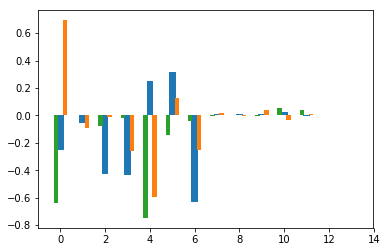

In [113]:
plt.bar(range(len(pca_angle.components_[0])),pca_angle.components_[0],width=.3)
plt.bar(np.arange(len(pca_angle.components_[0]))+.2,pca_angle.components_[1],width=.2)
plt.bar(np.arange(len(pca_angle.components_[0]))-.2,pca_angle.components_[2],width=.2)


plt.show()

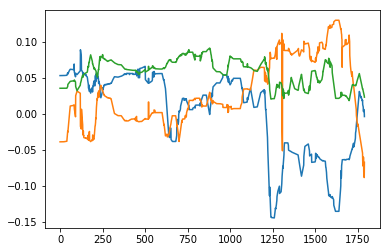

In [59]:
plt.plot(flat_data[:,0])
plt.plot(flat_data[:,1])
plt.plot(flat_data[:,2])

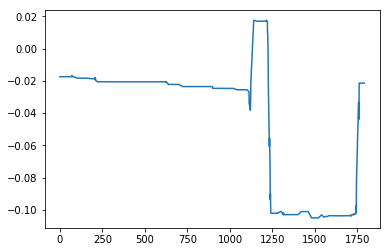

In [73]:
plt.plot(centered_data[:,-1,0])

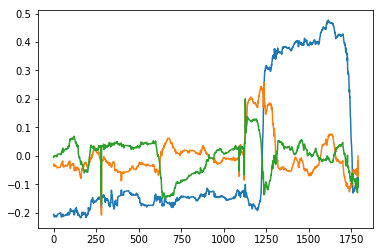

In [75]:
## Write 
plt.plot(principalComponents[:,0])
plt.plot(principalComponents[:,1])
plt.plot(principalComponents[:,2])

plt.show()

In [95]:
## Calculate all the angles!! 

def angle(v1,v2):
    #angle = np.arccos(np.dot(v1,v2)/(np.linalg.norm(v1) * np.linalg.norm(v2)))
    angle = np.arctan(np.linalg.norm(v1-v2)/np.linalg.norm(v1))
## Quick hack to keep track of directionality 
    if v2[2] < v1[2]:
        angle = angle * -1
    deg_angle = np.round(np.degrees(angle),4)
    return deg_angle

eye_center = np.mean([centered_data[:,4],centered_data[:,12]],0)
shoulder_center = np.mean([centered_data[:,5],centered_data[:,13]],0)

full_data = np.empty([1791,22,3])
full_data[:,:20] = centered_data
full_data[:,20] = eye_center
full_data[:,21] = shoulder_center

"""
0-2 Beak Tip 0 BT
3-5 Keel 1 KE
6-8 Tailbone 2 TB
9-  Tip of Tail 3 TT
12- Left Eye 4 LE
15- Left Shoulder 5 LS
18- Left Elbow 6 LB
21- Left Wrist 7 LW
24- Left Wing Tip 8 LT
27- Left Knee 9 LK
30- Left Ankle 10 LA
33- Left Heel 11 LH
36- Right Eye 12 RE
39- Right Shoulder 13 RS
42- Right Elbow 14 RB
45- RIght Wrist 15 RW
48- Right Wing Tip 16 RT
51- Right Knee 17 RK
54- Right Ankle 18 RA
57- Right Heel 19 RH
Eye Center (mean of 4,12): 20 EC 
Neck (shoulder Center, mean of 5,13): 21 NC
"""
## Define all the angles!!! =/
# Calculate all the angles!!! :D
angle_dict = {
    'neck-eye-beak':0,
    'eye-eye_center-horizontal':1,
    'left_elbow-wrist-tip':2,
    'right_elbow-wrist-tip':3,
    'left_wrist-neck-wrist':4,
    'eye-neck-tailbone':5,
    'neck-tailbone-tail':6,
    'left_knee-tailbone-knee':7,
    'tailbone-left_knee-ankle':8,
    'tailbone-right_knee-ankle':9,
    'left_knee-ankle-heel':10,
    'right_knee-ankle-heel':11
}
all_angles = np.zeros([1791,14])
# Neck-eye-beak (NC_EC_BT): 20-21,20-0 
EC_NC = full_data[:,20] - full_data[:,21]
EC_BT = full_data[:,20] - full_data[:,0]
NC_EC_BT = [angle(v1,v2) for v1,v2 in zip(EC_NC,EC_BT)]
all_angles[:,0] = NC_EC_BT

# Eye-Eye_center-horizontal plane: 20-12(with z20),20-12
horizontal_eye = np.array(full_data[:,12])
horizontal_eye[:,2] = full_data[:,20,2]
EC_LE = full_data[:,20] - full_data[:,12]
EC_HP = full_data[:,20] - horizontal_eye
LE_EC_HP = [angle(v1,v2) for v1,v2 in zip(EC_LE,EC_HP)]
all_angles[:,1] = LE_EC_HP

# Elbow-wrist-tip: 7-6,7-8 
LW_LB = full_data[:,7] - full_data[:,6]
LW_LT = full_data[:,7] - full_data[:,8]
LB_LW_LT = [angle(v1,v2) for v1,v2 in zip(LW_LB,LW_LT)]
all_angles[:,2] = LB_LW_LT

# Right EWT: 15-14, 15-16
RW_RB = full_data[:,15] - full_data[:,14]
RW_RT = full_data[:,15] - full_data[:,16]
RB_RW_RT = [angle(v1,v2) for v1,v2 in zip(RW_RB,RW_RT)]
all_angles[:,3] = RB_RW_RT

# Wrist-Neck-wrist: 21-7,21-15
NC_LW = full_data[:,21] - full_data[:,7]
NC_RW = full_data[:,21] - full_data[:,15]
LW_NC_RW = [angle(v1,v2) for v1,v2 in zip(NC_LW,NC_RW)]
all_angles[:,4] = LW_NC_RW

# Eye-Neck-Tailbone: 21-2,21-20
NC_TB = full_data[:,21] - full_data[:,2]
NC_EC = full_data[:,21] - full_data[:,20]
EC_NC_TB = [angle(v1,v2) for v1,v2 in zip(NC_TB,NC_EC)]
all_angles[:,5] = EC_NC_TB

# Neck-Tailbone-Tail: 2-21,2-3
TB_NC = full_data[:,2] - full_data[:,21]
TB_TT = full_data[:,2] - full_data[:,3]
NC_TB_TT = [angle(v1,v2) for v1,v2 in zip(TB_NC,TB_TT)]
all_angles[:,6] = NC_TB_TT

# Knee-Tailbone-Knee: 2-9,2-17
TB_LK = full_data[:,2] - full_data[:,9]
TB_RK = full_data[:,2] - full_data[:,17]
LK_TB_RK = [angle(v1,v2) for v1,v2 in zip(TB_LK,TB_RK)]
all_angles[:,7] = LK_TB_RK

# Tailbone-Knee-Ankle: 9-2,9-10
LK_TB = full_data[:,9] - full_data[:,2]
LK_LA = full_data[:,9] - full_data[:,10]
TB_LK_LA = [angle(v1,v2) for v1,v2 in zip(LK_TB,LK_LA)]
all_angles[:,8] = TB_LK_LA

# Right TKA: 17-2,17-18
RK_TB = full_data[:,17] - full_data[:,2]
RK_RA = full_data[:,17] - full_data[:,18]
TB_RK_RA = [angle(v1,v2) for v1,v2 in zip(RK_TB,RK_RA)]
all_angles[:,9] = TB_RK_RA

# Knee-Ankle-Heel: 10-9,10-11
LA_LK = full_data[:,10] - full_data[:,9]
LA_LH = full_data[:,10] - full_data[:,11]
LK_LA_LH = [angle(v1,v2) for v1,v2 in zip(LA_LK,LA_LH)]
all_angles[:,10] = LK_LA_LH

# Right KAH: 18-17,18-19
RA_RK = full_data[:,18] - full_data[:,17]
RA_RH = full_data[:,18] - full_data[:,19]
RK_RA_RH = [angle(v1,v2) for v1,v2 in zip(RA_RK,RA_RH)]
all_angles[:,11] = RK_RA_RH

## Could add location of legs
## Horizontal and Vertical location of body
## neck to wing tip (would get flaring of wings!)






In [97]:
pca_angle = PCA()
principalComponents_angle = pca_angle.fit_transform(all_angles)

(1791,)

<IPython.core.display.Javascript object>


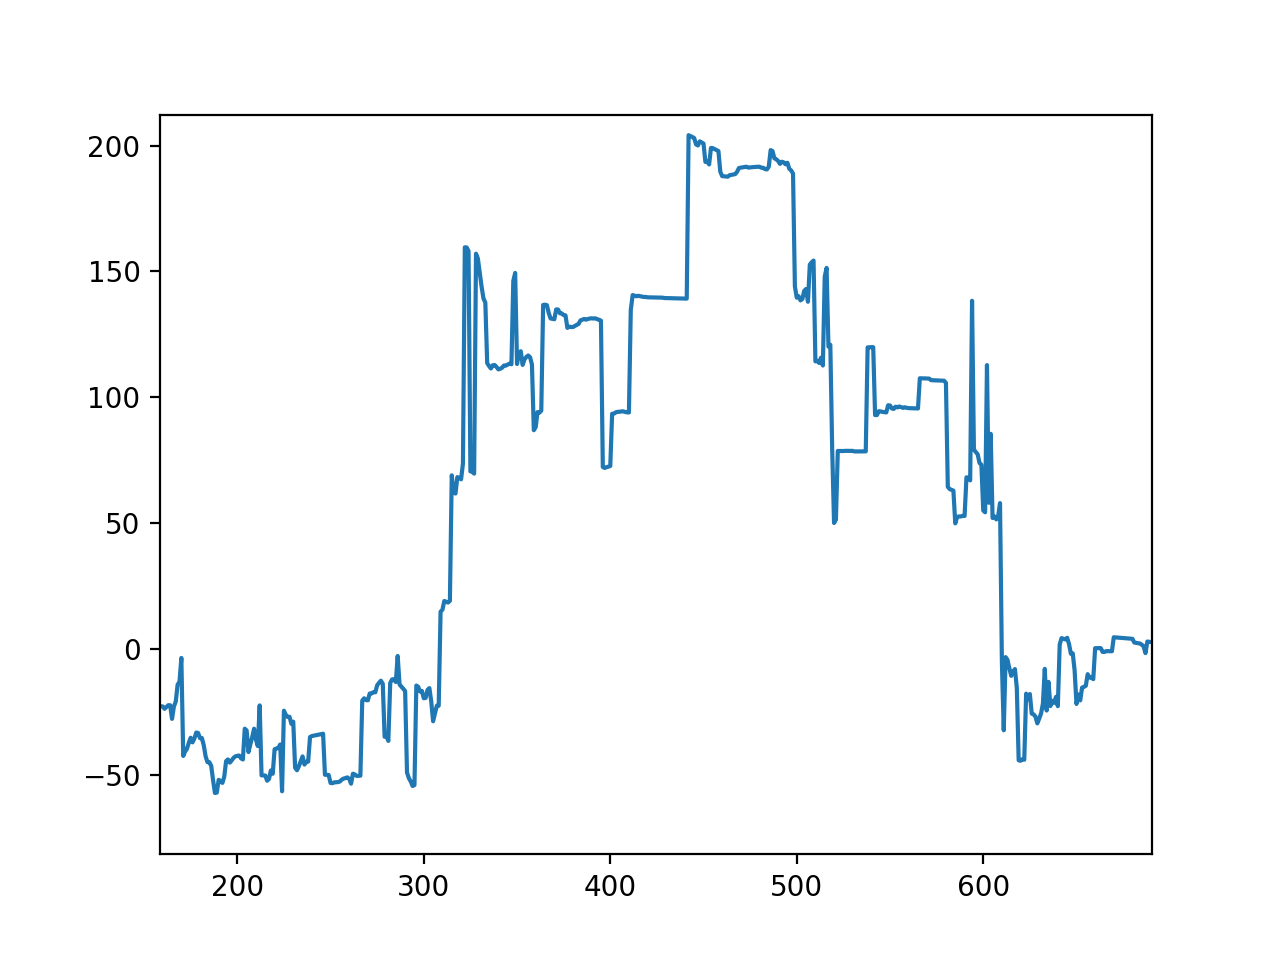

In [114]:
%matplotlib notebook

## This is too messy to do stats, but that is because of keypoint noise. I can keep preparing the code, so it's ready


plt.plot(principalComponents_angle[:,0])
#plt.plot(principalComponents_angle[:,1])
#plt.plot(principalComponents_angle[:,2])

plt.show()

In [104]:
print(np.round(pca_angle.explained_variance_ratio_,2))
print(np.round(pca_angle.components_[0],3))
print(np.round(pca_angle.components_[1],3))
print(np.round(pca_angle.components_[2],3))

[0.35 0.24 0.19 0.06 0.05 0.04 0.04 0.01 0.01 0.01 0.   0.   0.   0.  ]
[-0.255 -0.054 -0.425 -0.434  0.249  0.319 -0.631  0.013  0.01   0.011
  0.024 -0.002  0.     0.   ]
[ 0.694 -0.089 -0.012 -0.262 -0.597  0.128 -0.255  0.014 -0.002  0.041
 -0.033  0.009 -0.    -0.   ]
[-0.638  0.001 -0.079 -0.018 -0.748 -0.143 -0.042 -0.006  0.006 -0.001
  0.054  0.037  0.     0.   ]


In [19]:
import glob
my_dir = './Keypoints/detections/'
print(os.path.abspath(my_dir))

/home/ammon/Documents/Scripts/AnalyzePosture/Keypoints/detections


In [16]:
import os
os.path.abspath(my_dir)

TypeError: expected str, bytes or os.PathLike object, not list

In [23]:
postures_dir = '~/Documents/Scripts/AnalyzePosture/Keypoints/detections/'
os.path.abspath(postures_dir) + '/'

'/home/ammon/Documents/Scripts/AnalyzePosture/~/Documents/Scripts/AnalyzePosture/Keypoints/detections/'

In [27]:
glob.glob(os.path.expanduser('/home/ammon/Documents/Scripts/AnalyzePosture'))

['/home/ammon/Documents/Scripts/AnalyzePosture']

In [34]:
test = np.array([1,2,3,4])

base_ar = np.empty([0,4])
one = np.vstack([base_ar,test])
two = np.vstack([one,test])
print(two)

[[1. 2. 3. 4.]
 [1. 2. 3. 4.]]


In [33]:
np.vstack([base_ar,test])

array([[1., 2., 3., 4.]])

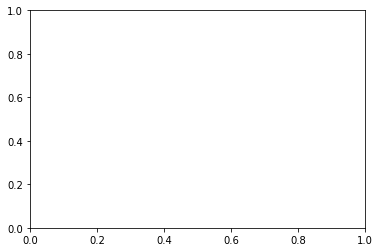

In [35]:
fig,ax = plt.subplots()
ax.set_t

In [13]:
import numpy as np
from scipy.spatial.distance import euclidean

from fastdtw import fastdtw

x = np.array([[1,1,1,1], [2,2,2,3], [3,3,3,3], [3,3,3,4],[4,4,4,4], [5,5,5,5]])
y = np.array([[1,1,1,2],[1,1,1,3],[2,2,2,3], [3,3,3,4], [4,4,4,5],[5,5,5,5]])
distance, path = fastdtw(x, y, dist=euclidean)
print(distance)

4.732050807568877


In [12]:
print(path)

[(0, 0), (0, 1), (1, 2), (2, 3), (3, 3), (4, 4), (5, 5)]


In [6]:
transform = [p[0] for p in path]

In [9]:
print(transform) ##transform is the mapping from x to y
x[transform] ## Remove transform duplicates to get a functional mapping...? 
## Also need to calculate cost. 

[0, 0, 1, 2, 3, 4, 5]


array([[1, 1],
       [1, 1],
       [2, 2],
       [3, 3],
       [3, 3],
       [4, 4],
       [5, 5]])

array([1, 2, 3, 4, 5])

In [1]:
import numpy as np

In [19]:
r_array = np.random.random([10,10])

print(r_array)
np.unravel_index(r_array.argmin(), r_array.shape)

[[0.12289922 0.02880524 0.66294292 0.68989693 0.11622949 0.27631564
  0.52903204 0.62247577 0.51781744 0.19915685]
 [0.44666729 0.36254657 0.53018522 0.31175778 0.30921952 0.64303551
  0.6885822  0.75139469 0.4931861  0.22202125]
 [0.86569627 0.55357155 0.94804578 0.95526218 0.02787873 0.1383378
  0.0340153  0.92477675 0.63958155 0.19486355]
 [0.68594865 0.039527   0.06027236 0.31913685 0.83864616 0.26352309
  0.70370345 0.74031002 0.31323584 0.9759804 ]
 [0.10800833 0.80229786 0.83323513 0.27302701 0.43812291 0.18008573
  0.81105442 0.35887448 0.44476035 0.12733007]
 [0.61284097 0.25893229 0.19386116 0.24529571 0.24266826 0.01082657
  0.68446871 0.82687841 0.45552839 0.20587851]
 [0.88819271 0.53643387 0.25007764 0.28811126 0.79142323 0.16511617
  0.33268342 0.79192697 0.77672886 0.10640684]
 [0.04014138 0.10517536 0.32233826 0.90320812 0.4577442  0.19025126
  0.4328414  0.73645529 0.75122812 0.32335632]
 [0.16076646 0.10881355 0.48465574 0.16873871 0.66241457 0.27242135
  0.751435   

(5, 5)

In [7]:
e_array = np.empty([5,5])
e_array.fill(np.nan)

In [8]:
print(e_array)

[[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]


In [10]:
r2_array = np.array(r_array)
r2_array[0,0] = 0
print(r_array)
print(r2_array)

[[0.28482405 0.71841605 0.42362389 0.78988978 0.92675715]
 [0.83052831 0.42127885 0.27805611 0.0490208  0.03176831]
 [0.22750377 0.99928964 0.72518024 0.74627136 0.06494073]
 [0.12304869 0.4563184  0.63421683 0.28010245 0.4951428 ]
 [0.5751727  0.14729742 0.17770843 0.95735277 0.00782102]]
[[0.         0.71841605 0.42362389 0.78988978 0.92675715]
 [0.83052831 0.42127885 0.27805611 0.0490208  0.03176831]
 [0.22750377 0.99928964 0.72518024 0.74627136 0.06494073]
 [0.12304869 0.4563184  0.63421683 0.28010245 0.4951428 ]
 [0.5751727  0.14729742 0.17770843 0.95735277 0.00782102]]


In [13]:
r_array[:-1]

array([[0.28482405, 0.71841605, 0.42362389, 0.78988978, 0.92675715],
       [0.83052831, 0.42127885, 0.27805611, 0.0490208 , 0.03176831],
       [0.22750377, 0.99928964, 0.72518024, 0.74627136, 0.06494073],
       [0.12304869, 0.4563184 , 0.63421683, 0.28010245, 0.4951428 ]])

In [22]:
i = 4
j = 7

A = np.arange(10)
sub_index = (A[(A != j) & (A != i)])
print(sub_index)

[0 1 2 3 5 6 8 9]


In [27]:
np.array(r_array[sub_index])[:,sub_index]

array([[0.12289922, 0.02880524, 0.66294292, 0.68989693, 0.27631564,
        0.52903204, 0.51781744, 0.19915685],
       [0.44666729, 0.36254657, 0.53018522, 0.31175778, 0.64303551,
        0.6885822 , 0.4931861 , 0.22202125],
       [0.86569627, 0.55357155, 0.94804578, 0.95526218, 0.1383378 ,
        0.0340153 , 0.63958155, 0.19486355],
       [0.68594865, 0.039527  , 0.06027236, 0.31913685, 0.26352309,
        0.70370345, 0.31323584, 0.9759804 ],
       [0.61284097, 0.25893229, 0.19386116, 0.24529571, 0.01082657,
        0.68446871, 0.45552839, 0.20587851],
       [0.88819271, 0.53643387, 0.25007764, 0.28811126, 0.16511617,
        0.33268342, 0.77672886, 0.10640684],
       [0.16076646, 0.10881355, 0.48465574, 0.16873871, 0.27242135,
        0.751435  , 0.06861369, 0.58452765],
       [0.30715623, 0.26005574, 0.14593131, 0.27300033, 0.07362849,
        0.87292077, 0.04438781, 0.97743004]])

In [3]:
import numpy as np
import pickle
from align_postures import Trajectory
import os
from matplotlib import pyplot as plt
from scipy.spatial.distance import euclidean

from fastdtw import fastdtw

In [37]:

with open('./seqs.dat','rb') as f:
    seqs = pickle.load(f)
    
with open('./path_dict.pkl','rb') as f:
    path_dict = pickle.load(f)

[70, 71]


<IPython.core.display.Javascript object>


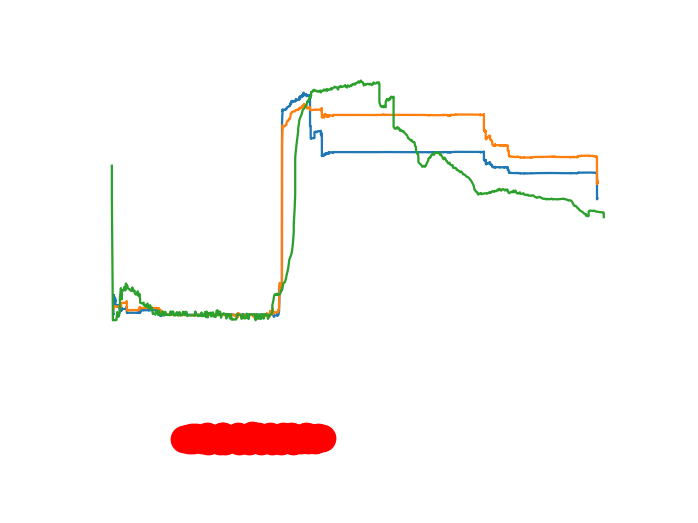

In [49]:
print(seqs[72].parents)

plt.plot(seqs[72].ts,seqs[72].data)
plt.plot(seqs[70].ts,seqs[70].data)
plt.plot(seqs[71].ts,seqs[71].data)


<IPython.core.display.Javascript object>


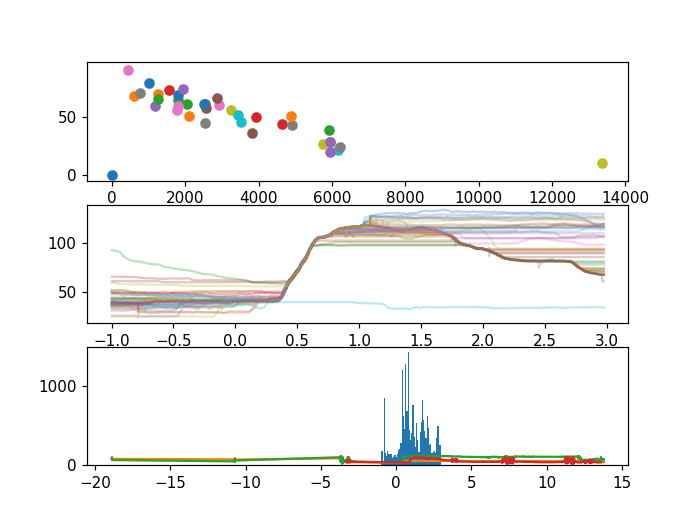

0 0.0 0.0
1 597.3463559999989 68.0924051490067
2 1795.888477 64.94760298296082
3 5943.0041630000005 28.781255172902743
4 1172.9272909999995 59.32906094039484
5 2530.0525210000005 61.788437278105306
6 441.51453000000004 90.67128599520629
7 763.110392999999 70.90308826850477
8 13368.747389999997 10.278390355061656
9 6170.878923999999 21.65467624821236
10 1794.668582999999 69.36330589629276
11 1252.368548000002 69.84946379027369
12 5923.508027000001 39.113413373949754
13 4646.450780999999 44.597019754649835
14 5941.682082000002 19.968277294642125
15 2552.552398 57.70920298612492
16 2916.8376800000005 60.26301865238753
17 2543.346418999998 45.19596657876846
18 5763.412748999998 27.129711263657978
19 3532.3872780000006 45.584550718764284
20 1005.731483 79.12535306956512
21 2091.485706 51.47871887840972
22 2036.8822689999995 61.69654905997787
23 3935.265917 50.64839481245599
24 1934.7585949999977 74.54774441974546
25 3810.8695929999994 36.678151420851044
26 1799.2896719999997 59.924125981536

In [30]:
from align_postures import dtw_align
%matplotlib notebook

fig,(ax1,ax2,ax3) = plt.subplots(3)
ax2.plot(seqs[0].ts,seqs[0].response_data)
costs = np.zeros(len(seqs[0].ts))
cost_counts = []

for s in range(38):
    distance,path = fastdtw(seqs[0].data,seqs[s].data)
    aligned_data, aligned_ts, cost, cost_points = dtw_align(seqs[0],seqs[s],path=path,strat='canon')
    print(seqs[s].index,distance,cost)
    round_costs = np.round(cost_points * 10)
    for t in range(len(round_costs)):
        [cost_counts.append(x) for x in [aligned_ts[t]]*int(round_costs[t])]
    ax1.scatter(distance,cost)
    ax2.plot(aligned_ts,aligned_data,alpha=.3)
    
ax3.hist(cost_counts,bins=50)

fig.show()

In [116]:
seq = seqs[75]
seq.cost_ts

array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
       0.34657359])

In [117]:
seq.cost_ts

array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
       0.34657359])

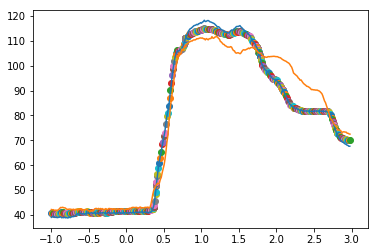

In [46]:
%matplotlib inline
plt.plot(seqs[0].ts,seqs[0].data)
plt.plot(seqs[1].ts,seqs[1].data)

for p in range(len(path)):
    pair = path[p]
    t_mean = np.mean([seqs[0].ts[pair[0]],seqs[1].ts[pair[1]]])
    y_mean = np.mean([seqs[0].data[pair[0]],seqs[1].data[pair[1]]])
    plt.scatter(seqs[0].ts[pair[0]],y_mean)
plt.show()

In [53]:
distance_space,path_space = fastdtw(seqs[0].data,seqs[1].data,dist=euclidean)


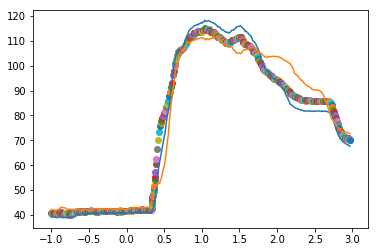

In [59]:
%matplotlib inline
plt.plot(seqs[0].ts,seqs[0].response_data[:-1])
plt.plot(seqs[1].ts,seqs[1].response_data[:-1])



for p in range(len(path_space)):
    pair = path_space[p]
    t_mean_space = np.mean([seqs[0].ts[pair[0]],seqs[1].ts[pair[1]]])
    y_mean_space = np.mean([seqs[0].response_data[pair[0]],seqs[1].response_data[pair[1]]]) 
    plt.scatter(seqs[0].ts[pair[0]],y_mean_space)
plt.show()

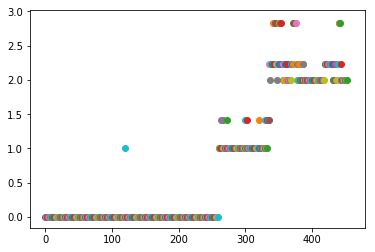

In [40]:
%matplotlib inline
for p in range(len(path)):
    plt.scatter(p,np.linalg.norm(np.array(path[p]) - np.array(path_space[p])))
plt.show()

In [67]:
np.shape(path)

(1012, 2)

In [15]:
print(seqs[51].cost_ts + seqs[52].cost_ts)

ValueError: operands could not be broadcast together with shapes (318,) (444,) 

In [8]:
seq.cost_ts

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.09861229, 0.        , 0.69314718,
       0.        , 0.        , 1.94591015, 0.        , 0.        ,
       0.        , 2.39789527, 1.09861229, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.69314718, 0.        ,
       0.        , 0.        , 0.        , 0.69314718, 0.        ,
       0.        , 0.69314718, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.69314718,
       0.        , 0.        , 0.        , 0.        , 0.     

ValueError: operands could not be broadcast together with shapes (445,) (317,) 

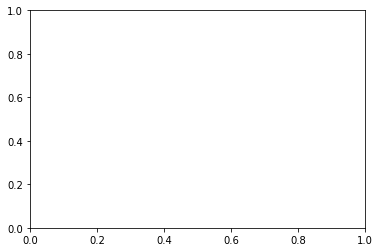

In [17]:
h = plt.hist2d(seq.ts,seq.cost_ts)

In [27]:
from align_postures import dtw_cost

dtw_cost(path)

((49.68593907331644, 78.5107563917681),
 (array([5, 4, 1, ..., 1, 1, 1]),
  array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
           1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   6,
           1,   1,   1,   1,   2,   1,   1,   1,   1,   1,   1,   1,   1,
           1,   2,   1,   1,   1,   1,   2,   1,   1,   2,   5,   2,   1,
         498,   1,   1,   1,   1,   1,   7,   1,   1,   1,  32,   4,   1,
          17,   1,   1,   1,   1,   8,   1,   1,   1,   5,  11,   7,   1,
           1,   2,   6,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
           1,  12,   1,   2,   4,   1,   5,  12,   1,   1,   1,   1,   1,
           1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
           1,   1,   1,   1,   1,  31,   9,   1,   2,   1,   1,   1,   1,
           1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   6,   1,   1,
           2,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
           1,   1,   1,   1,   1,   1,

In [67]:
path_array = np.array(path)
print(path_array[:,1])
values,counts = np.unique(path_array[:,1],return_counts=True)

[  0   1   2 ... 316 316 317]


In [36]:
path_array[path_array[:,0] == 1]

array([[1, 5],
       [1, 6],
       [1, 7],
       [1, 8]])

In [40]:
cost_array = np.zeros_like(path_array)

In [42]:
cost_array[path_array[:,0] == 1][:,0] = 1

In [45]:
cost_array[path_array[:,0] == 1][:,0].fill(1)

In [62]:
cost_array[path_array[:,0] == 1]

array([[2, 2],
       [2, 2],
       [2, 2],
       [2, 2]])

In [61]:
cost_array[path_array[:,0] == 1] = 2

In [63]:
cost_array1 = np.zeros(len(path_array))
cost_array0 = np.zeros(len(path_array))


In [65]:
cost_array1[path_array[:,0] == 1] = 2
cost_array1[path_array[:,0] == 1]

array([2., 2., 2., 2.])

In [71]:
indices_0, counts_0 = np.unique(path_array[:,0],return_counts=True)
indices_1, counts_1 = np.unique(path_array[:,1],return_counts=True)

for p in range(len(path_array)):
    cost0 = counts_0[indices_0==path_array[p,0]]
    cost1 = counts_1[indices_1==path_array[p,1]]
    cost_array0[p] = np.log(cost0) / cost0
    cost_array1[p] = np.log(cost1) / cost1
    


In [72]:
cost_array0

array([0.32188758, 0.32188758, 0.32188758, ..., 0.        , 0.        ,
       0.        ])

In [73]:
len(cost_array0),len(cost_array1)

(1898, 1898)

In [130]:
np.round(seq.cost_ts * 100)

array([ 0.,  0.,  0., ...,  0.,  0., 35.])

(array([908., 306., 108.,   0.,  65., 128.,  38.,  46.,  36., 252.]),
 array([ 0. ,  3.7,  7.4, 11.1, 14.8, 18.5, 22.2, 25.9, 29.6, 33.3, 37. ]),
 <a list of 10 Patch objects>)

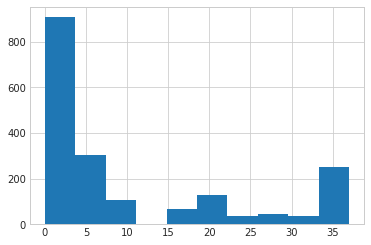

In [129]:
plt.hist(np.round(seq.cost_ts * 100))

In [51]:
A = np.load('./all_distances.npy')
print(A)

[[       nan 158.12137  165.50277  ... 153.325766 143.549619 143.459279]
 [       nan        nan 200.713742 ... 191.088934 190.151473 195.945526]
 [       nan        nan        nan ... 166.781104 180.263128 162.371792]
 ...
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]]


In [59]:
X = A[:39]
for i in range(len(X)):
    for j in range(len(X)):
        if i == j:
            X[i,j] = 0
        else:
            X[j,i] = X[i,j]
print(X)

[[(  0.      ,) (158.12137 ,) (165.50277 ,) ... (153.325766,)
  (143.549619,) (143.459279,)]
 [(158.12137 ,) (  0.      ,) (200.713742,) ... (191.088934,)
  (190.151473,) (195.945526,)]
 [(165.50277 ,) (200.713742,) (  0.      ,) ... (166.781104,)
  (180.263128,) (162.371792,)]
 ...
 [(153.325766,) (191.088934,) (166.781104,) ... (  0.      ,)
  (161.185729,) (137.457118,)]
 [(143.549619,) (190.151473,) (180.263128,) ... (161.185729,)
  (  0.      ,) (125.388848,)]
 [(143.459279,) (195.945526,) (162.371792,) ... (137.457118,)
  (125.388848,) (  0.      ,)]]


In [60]:
import numpy as np
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(39, 2)

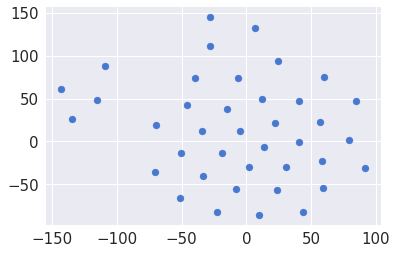

In [63]:
plt.scatter(X_embedded[:,0],X_embedded[:,1])
plt.show()

In [65]:
test_data = np.genfromtxt('./processed_postures/2018-06-01-09-48-06.txt')

data = test_data[:,[5,3]]

In [70]:
np.shape(data)

(1344, 2)

In [73]:
np.shape(np.diff(data,0))

(1344, 2)

In [79]:
print(data)
print(np.diff(data))

[[8.76044130e+01 4.00000000e-05]
 [6.19654200e+01 7.90000000e-05]
 [3.71414360e+01 1.16000000e-04]
 ...
 [1.08138971e+02 1.30000000e-04]
 [1.07981607e+02 1.31000000e-04]
 [1.08052412e+02 1.30000000e-04]]
[[ -87.604373]
 [ -61.965341]
 [ -37.14132 ]
 ...
 [-108.138841]
 [-107.981476]
 [-108.052282]]


In [76]:
data[0] - data[1]

array([ 2.5638993e+01, -3.9000000e-05])

In [83]:
ys = test_data[:,5]
e2 = test_data[:,3]
np.array(zip(ys,e2))

array(<zip object at 0x7f2fce9aa6c8>, dtype=object)